MAE: 7.000895202800873
MSE: 43131.02959410168
R2: 0.0


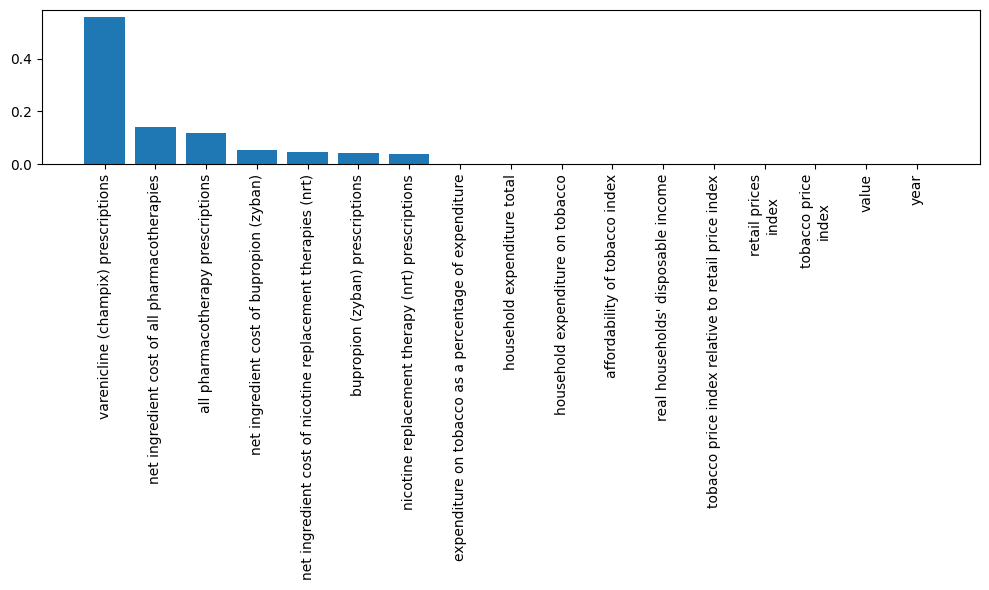

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

files = [
    r"C:\Users\racha\Downloads\admissions.csv", r"C:\Users\racha\Downloads\fatalities.csv", r"C:\Users\racha\Downloads\predictions.csv", r"C:\Users\racha\Downloads\metrics.csv" ,r"C:\Users\racha\Downloads\prescriptions.csv"
]

dfs = []
for f in files:
    df = pd.read_csv(f)
    df.columns = [c.lower().strip() for c in df.columns]
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    dfs.append(df)

data = pd.concat(dfs, axis=0, ignore_index=True)
num_data = data.select_dtypes(include=[np.number])
num_data = num_data.fillna(num_data.mean())
num_data = num_data.loc[:, num_data.std() > 0]

if num_data.shape[1] < 2:
    raise ValueError("Not enough numeric columns to train a model. Check dataset content.")

y = num_data.iloc[:, -1]
X = num_data.iloc[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()
